In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [158]:
df = sns.load_dataset("mpg")

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [160]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [161]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [162]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [163]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower'].isnull().sum()

0

<Axes: xlabel='displacement', ylabel='Count'>

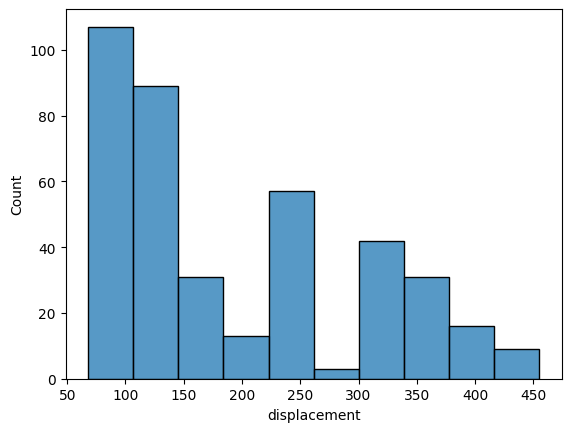

In [164]:
sns.histplot(df['displacement'])

<Axes: xlabel='horsepower', ylabel='Count'>

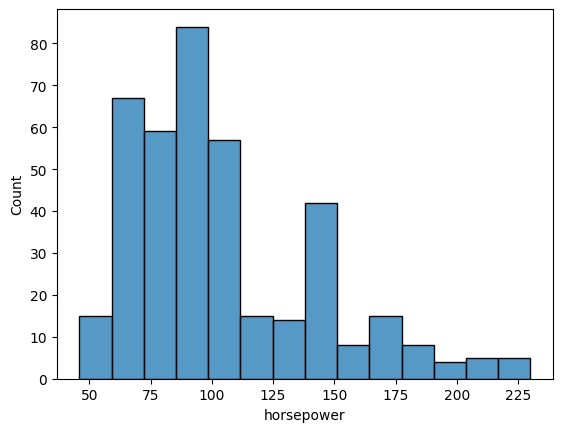

In [165]:
sns.histplot(df['horsepower'])

<Axes: xlabel='mpg', ylabel='Count'>

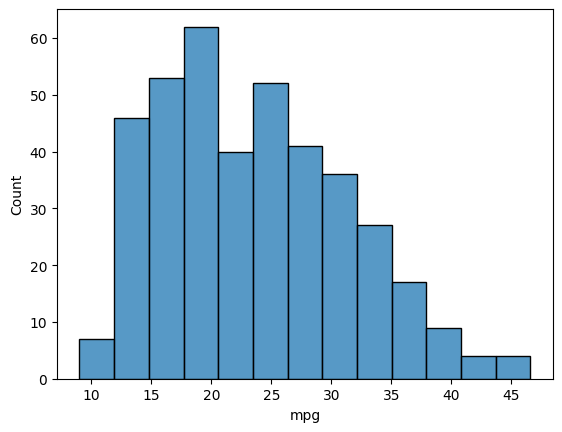

In [166]:
sns.histplot(df['mpg'])

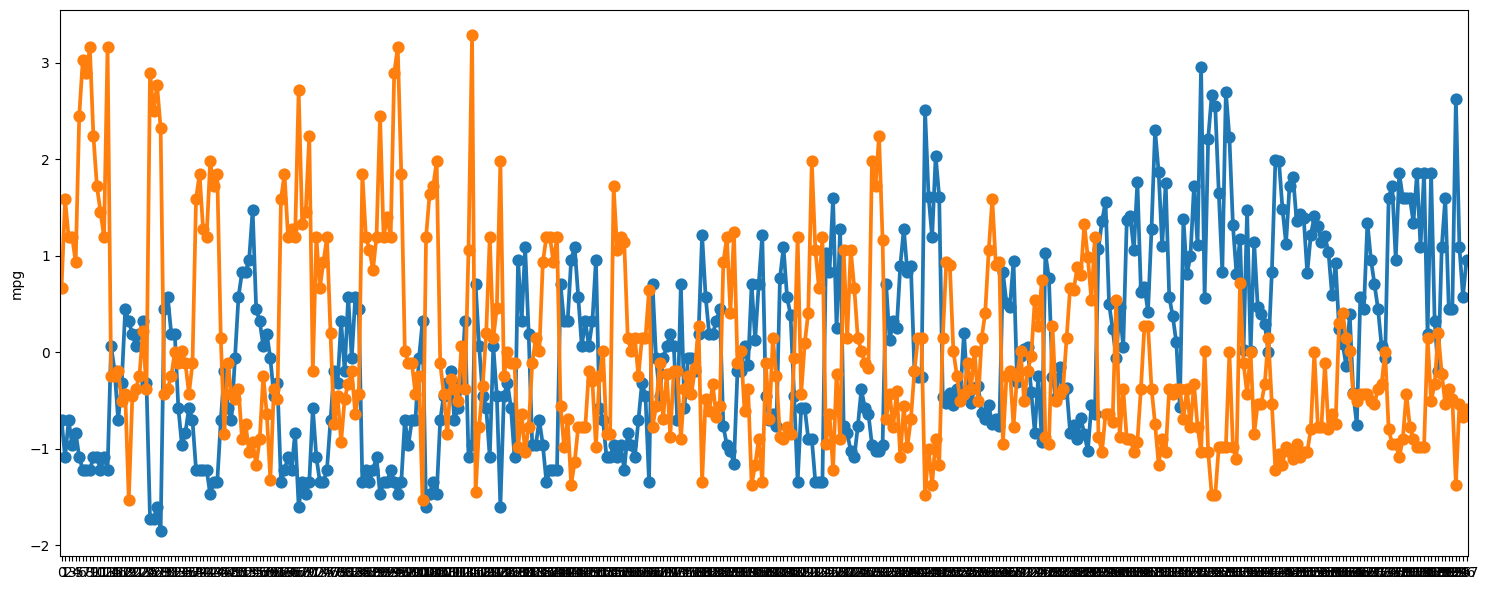

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mul_cols = ["mpg", "horsepower"]
df[mul_cols] = scaler.fit_transform(df[mul_cols])
plt.figure(figsize=(15,6))
sns.pointplot(df['mpg'])
sns.pointplot(df['horsepower'])
plt.tight_layout()

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


<Axes: >

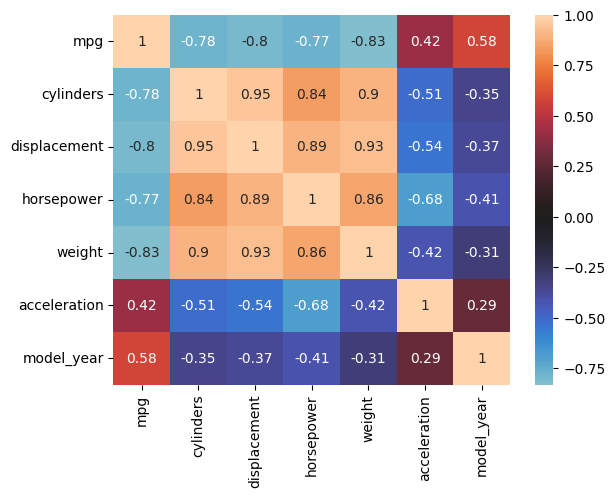

In [168]:
numeric_cols = df.dtypes[df.dtypes != "object"].index.to_list()
print(numeric_cols)
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, center=0)

In [169]:
corr["mpg"].abs().sort_values(ascending=False)

,mpg
mpg,1.000000
weight,0.831741
displacement,0.804203
cylinders,0.775396
horsepower,0.771437
model_year,0.579267
acceleration,0.420289


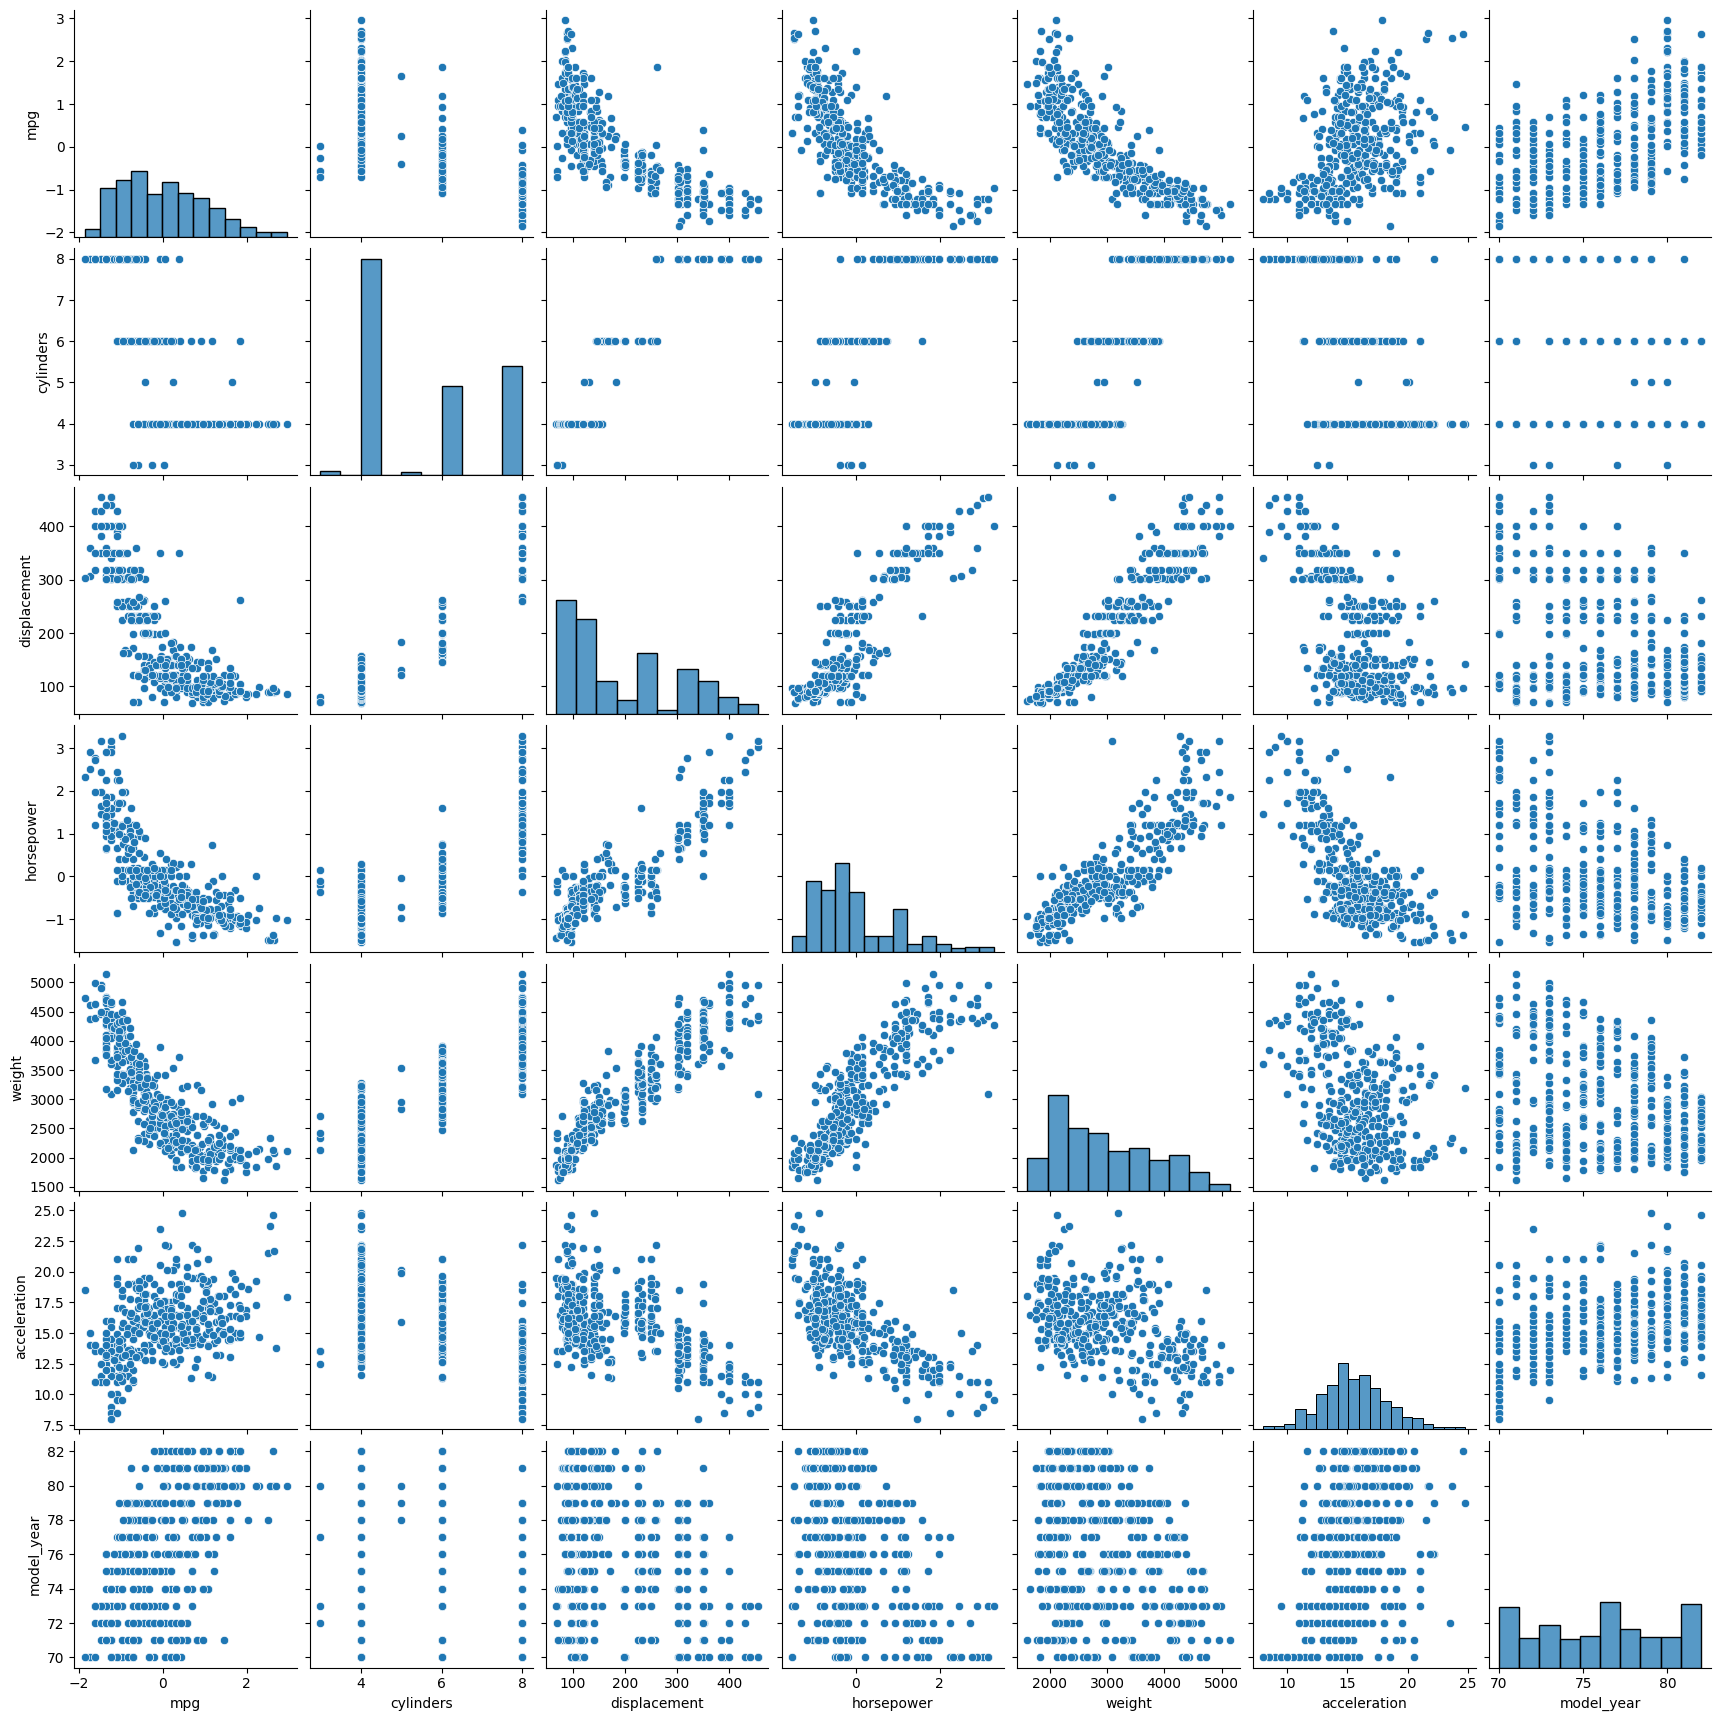

In [170]:
sns.pairplot(df)

<Axes: xlabel='displacement', ylabel='Density'>

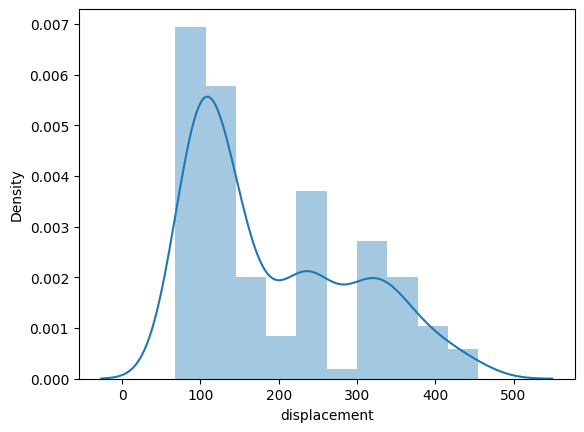

In [171]:
sns.distplot(df['displacement'])

name
ford pinto             0.015075
toyota corolla         0.012563
amc matador            0.012563
ford maverick          0.012563
chevrolet chevette     0.010050
                         ...   
chevrolet monza 2+2    0.002513
ford mustang ii        0.002513
pontiac astro          0.002513
amc pacer              0.002513
chevy s-10             0.002513
Name: proportion, Length: 305, dtype: float64
0      0.005025
1      0.002513
2      0.002513
3      0.002513
4      0.002513
         ...   
393    0.002513
394    0.002513
395    0.002513
396    0.002513
397    0.002513
Name: name, Length: 398, dtype: float64


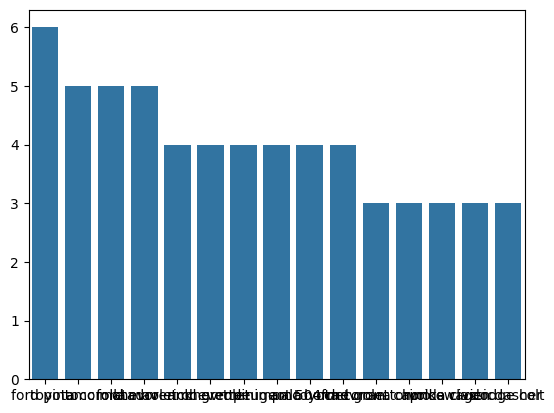

In [172]:
len(df["name"].unique())
print(df["name"].value_counts(normalize=True))
nlist = df["name"].value_counts()[:15].index.to_list()
values = df["name"].value_counts()[:15].values
# print(nlist)
sns.barplot(x=nlist, y=values)

df["name"] = df["name"].map(df["name"].value_counts(normalize=True))
print(df["name"])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [174]:
print(df.apply(lambda x : x.unique()))
print(df.apply(lambda x : len(x.unique())))

mpg             [-0.706438700650983, -1.0907506236404463, -0.9...
cylinders                                         [8, 4, 6, 3, 5]
displacement    [307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454...
horsepower      [0.669196079891938, 1.5865991790243708, 1.1934...
weight          [3504, 3693, 3436, 3433, 3449, 4341, 4354, 431...
acceleration    [12.0, 11.5, 11.0, 10.5, 10.0, 9.0, 8.5, 8.0, ...
model_year      [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...
origin                                       [usa, japan, europe]
name            [0.005025125628140704, 0.002512562814070352, 0...
dtype: object
mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
name              6
dtype: int64


In [175]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [176]:
origin = pd.get_dummies(df["origin"]).astype(int)
print(origin)
df_new = pd.concat([df, origin], axis=1)
print(df_new)

     europe  japan  usa
0         0      0    1
1         0      0    1
2         0      0    1
3         0      0    1
4         0      0    1
..      ...    ...  ...
393       0      0    1
394       1      0    0
395       0      0    1
396       0      0    1
397       0      0    1

[398 rows x 3 columns]
          mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   -0.706439          8         307.0    0.669196    3504          12.0   
1   -1.090751          8         350.0    1.586599    3693          11.5   
2   -0.706439          8         318.0    1.193426    3436          11.0   
3   -0.962647          8         304.0    1.193426    3433          12.0   
4   -0.834543          8         302.0    0.931311    3449          10.5   
..        ...        ...           ...         ...     ...           ...   
393  0.446497          4         140.0   -0.484111    2790          15.6   
394  2.624265          4          97.0   -1.375302    2130          24.6   
395 

In [177]:
print(df["model_year"].unique())
print(len(df["model_year"].unique()))

[70 71 72 73 74 75 76 77 78 79 80 81 82]
13


In [178]:
# mpg             129
# displacement     82
# horsepower       94
# weight          351
# acceleration     95
# model_year       13
# origin            3
# name              6
# cylinders         5

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df[["mpg"]]
x = df.drop(["mpg", "origin"], axis=1)

onehot_encoder = OneHotEncoder(sparse_output=False) # origin, cylinders,
onehot_col = ["cylinders"]
encoded_x = onehot_encoder.fit_transform(x[onehot_col])
encoded_cols = onehot_encoder.get_feature_names_out(onehot_col)
encoded_df = pd.DataFrame(encoded_x, columns=encoded_cols)

x_encoded = x.drop(["cylinders"],axis=1)
x_encoded = pd.concat([encoded_df, x_encoded], axis=1)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
# name은 이미 frequency Encoding을 함
# 스케일링 목록 : # displacement, horsepower, weight, acceleration, model_year
lbl_cols = ["displacement", "horsepower", "weight", "acceleration", "model_year"]

scaler = StandardScaler()
X_train[lbl_cols] = scaler.fit_transform(X_train[lbl_cols])
X_test[lbl_cols] = scaler.transform(X_test[lbl_cols])

X_train.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,displacement,horsepower,weight,acceleration,model_year,name
3,0.0,0.0,0.0,0.0,1.0,1.090196,1.261834,0.552826,-1.319334,-1.696667,0.002513
18,0.0,1.0,0.0,0.0,0.0,-0.922996,-0.413513,-0.999667,-0.413182,-1.696667,0.005025
376,0.0,1.0,0.0,0.0,0.0,-0.981350,-0.953948,-1.124772,0.927922,1.638975,0.002513
248,0.0,1.0,0.0,0.0,0.0,-0.981350,-1.170121,-1.392854,0.275493,0.527094,0.005025
177,0.0,1.0,0.0,0.0,0.0,-0.747936,-0.224361,-0.327675,-0.231952,-0.306816,0.005025


## 모델 학습 및 스케일링

In [179]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [180]:
# 한번에 인코딩하기
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# ct = ColumnTransformer(
#     [("scaling",StandardScaler(),['age','hours-per-week']),
#     ("onehot",OneHotEncoder(sparse = False),['workclass','education','gender','occupation'])]
# )
# from sklearn.compose import make_column_transformer
# ct = make_column_transformer(
#     (StandardScaler(), ['age','hours-per-week']),
#     (OneHotEncoder(sparse = False),['workclass','education','gender','occupation'])
# )

In [184]:
gb = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

gb.fit(X_train, y_train)

y_predict = gb.predict(X_test)

from sklearn.metrics import mean_squared_error as mse

print(mse(y_predict, y_test))

0.09893192143734635


In [190]:
# 튜닝
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [188]:
# 파라미터 종류 보기
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [189]:
param_grid = {
    'max_depth':[None, 3,4,5],
    'n_estimators':[None, 100, 200, 300, 400],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'learning_rate':[0.01, 0.05, 0.1]
    }
#  'accuracy', 'f1', 회귀 알고리즘일 때는 'neg_mean_squared_error', 'r2'
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 n_estimators=300,
                                                 random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [None, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [None, 100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [191]:
print('best params', grid_search.best_params_)
print('best score', round(grid_search.best_score_, 4))

best params {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
best score -0.1663


In [194]:
#  'accuracy', 'f1', 회귀 알고리즘일 때는 'neg_mean_squared_error', 'r2'
random_search = RandomizedSearchCV(gb, param_distributions=param_grid, n_iter=50, cv=3, scoring='neg_mean_squared_error', refit=True)
random_search.fit(X_train, y_train)

print('best params', random_search.best_params_)
print('best score', abs(round(random_search.best_score_, 4)))

best params {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
best score 0.1674


In [197]:
y_predict = random_search.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_squared_error(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(r2_score(y_test,y_predict))

0.08623565743292791
0.22278036546460456
0.9022649455334805
